In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


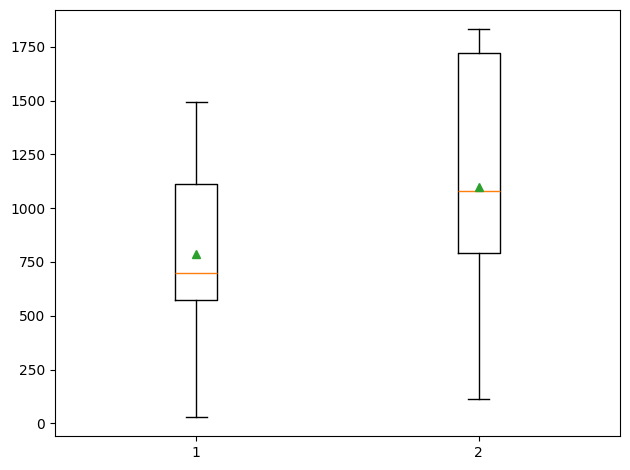

In [4]:
a = np.random.randint(10,1500, 25)
b = np.random.rand(25)
c = np.random.randint(5,2000, 25)
d = c*b

# :sfig

fig, axis = plt.subplots()
axis.boxplot(a, showmeans=True)
axis.boxplot(c, showmeans=True, positions=[2])

fig.tight_layout()
plt.show()

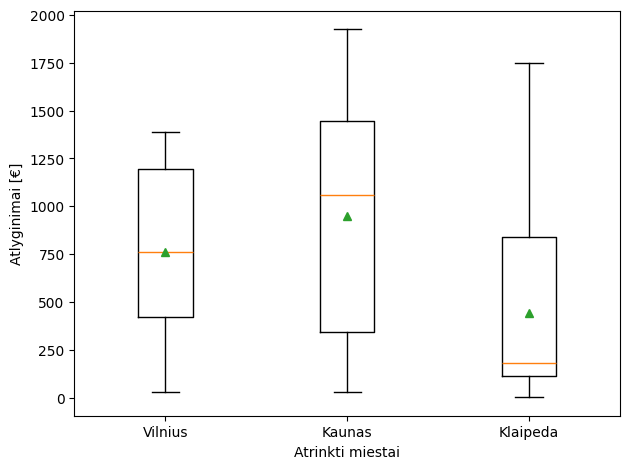

In [5]:
a = np.random.randint(10,1500, 25)
b = np.random.rand(25)
c = np.random.randint(5,2000, 25)
d = c*b

data=[a,c,d]
# :sfig

fig, axis = plt.subplots()
axis.boxplot(data, showmeans=True)

axis.set_ylabel('Atlyginimai [€]')
axis.set_xlabel('Atrinkti miestai')

axis.set_xticklabels(['Vilnius', 'Kaunas', 'Klaipeda'])

fig.tight_layout()
plt.show()

In [6]:
# .merge()

# miestaiSuApskritimis = pd.merge(left=miestai, right=apskritys, left_on='Apskritis', right_on='Kodas', how='left')
# miestaiSuApskritimis.head()

In [7]:
# Nuskaitykite life-exp.csv;
# gov-forms.csv
# ir sujunkite šias dvi lenteles į vieną naują lentelę.

In [8]:
life = pd.read_csv('life-exp.csv')
life.head(3)

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1955,29.854
1,Africa,NaN,1955,38.783
2,Albania,ALB,1955,57.007


In [9]:
gov = pd.read_csv('gov-forms.csv')
gov.head(3)

,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,Republic,Executive,Presidency independent of legislature; ministr...


In [10]:
miestai = pd.merge(left=life, right=gov, left_on='Entity', right_on='Name', how='inner')
miestai.head()

,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,AFG,1955,29.854,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,ALB,1955,57.007,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,DZA,1955,43.916,Algeria,Republic,Executive,Presidency independent of legislature; ministr...
3,Andorra,AND,1955,66.111,Andorra,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
4,Angola,AGO,1955,36.315,Angola,Republic,Executive,Presidency is independent of legislature


In [11]:
# Ar yra priklausomybė tarp vidutinės gyvenimo trukmės ir konstitucinės valdymo formos?
mgr = miestai.groupby(by='Constitutional form')


In [12]:
mgr.groups.keys()

dict_keys(['Absolute monarchy', 'Constitutionalmonarchy', 'Provisional', 'Republic'])

In [13]:
mgr.mean(numeric_only=True).reset_index()

,Constitutional form,Year,Life expectancy
0,Absolute monarchy,1987.0,61.081746
1,Constitutionalmonarchy,1987.0,69.221684
2,Provisional,1987.0,52.069023
3,Republic,1987.0,62.235011


In [14]:
miestai2019 = miestai.query('Year == 2019')
m2019grp = miestai2019.groupby(by=['Constitutional form'])
m2019grp.mean(numeric_only=True).reset_index()


,Constitutional form,Year,Life expectancy
0,Absolute monarchy,2019.0,72.262000
1,Constitutionalmonarchy,2019.0,77.183368
2,Provisional,2019.0,64.171333
3,Republic,2019.0,71.958209


In [15]:
# Suraskite 3kias valstybes, kuriose 2019 metais buvo trumpiausia gyvenimo trukmė.
miestai2019.sort_values(by='Life expectancy').head(3)

,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
11679,Central African Republic,CAF,2019,53.283,Central African Republic,Republic,Executive,Presidency is independent of legislature
11680,Chad,TCD,2019,54.239,Chad,Provisional,NONE,No constitutionally-defined basis to current r...
11735,Lesotho,LSO,2019,54.331,Lesotho,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence


In [16]:
# bei 3, kuriose buvo ilgiausia. hint: sort_values(by=), tail, head
miestai2019.sort_values(by='Life expectancy').tail(3)

,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
11725,Japan,JPN,2019,84.629,Japan,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
11787,San Marino,SMR,2019,84.972,San Marino,Republic,Executive,Presidency is elected by legislature; ministry...
11752,Monaco,MCO,2019,86.751,Monaco,Constitutionalmonarchy,Executive,Monarch personally exercises power in concert ...


In [17]:
miestai2019 = miestai.query('Year == 2019')[['Entity', 'Life expectancy']].sort_values(by='Life expectancy')
trump = miestai2019.head(3)
trump

,Entity,Life expectancy
11679,Central African Republic,53.283
11680,Chad,54.239
11735,Lesotho,54.331


In [18]:
miestai2019 = miestai.query('Year == 2019')[['Entity', 'Life expectancy']].sort_values(by='Life expectancy')
ilg = miestai2019.tail(3)
ilg

,Entity,Life expectancy
11725,Japan,84.629
11787,San Marino,84.972
11752,Monaco,86.751


In [19]:
for country in ilg['Entity']:
    print(country)

Japan
San Marino
Monaco


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


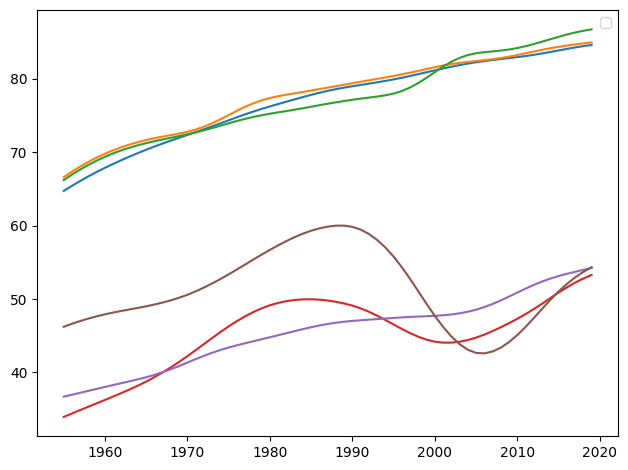

In [20]:
# ADVANCED:
# su query() ir for ciklais, .plot() komanda atavizduokite šių atrinktų valstybių
# istorinius gyvenimo trukmės duomenis

# x = year, y = life

japan = miestai.query('Entity == "Japan"')
life_japan = japan[['Year', 'Life expectancy']].sort_values(by='Year')
sanmarino = miestai.query('Entity == "San Marino"')
life_sanmarino = sanmarino[['Year', 'Life expectancy']].sort_values(by='Year')
monaco = miestai.query('Entity == "Monaco"')
life_japan = monaco[['Year', 'Life expectancy']].sort_values(by='Year')
cntrafrep = miestai.query('Entity == "Central African Republic"')
life_japan = cntrafrep[['Year', 'Life expectancy']].sort_values(by='Year')
chad = miestai.query('Entity == "Chad"')
life_japan = chad[['Year', 'Life expectancy']].sort_values(by='Year')
lesotho = miestai.query('Entity == "Lesotho"')
life_japan = lesotho[['Year', 'Life expectancy']].sort_values(by='Year')


fig, axis = plt.subplots()
axis.plot(japan['Year'], japan['Life expectancy'])
axis.plot(sanmarino['Year'], sanmarino['Life expectancy'])
axis.plot(monaco['Year'], monaco['Life expectancy'])
axis.plot(cntrafrep['Year'], cntrafrep['Life expectancy'])
axis.plot(chad['Year'], chad['Life expectancy'])
axis.plot(lesotho['Year'], lesotho['Life expectancy'])

axis.legend(loc='best')
fig.tight_layout()
plt.show()

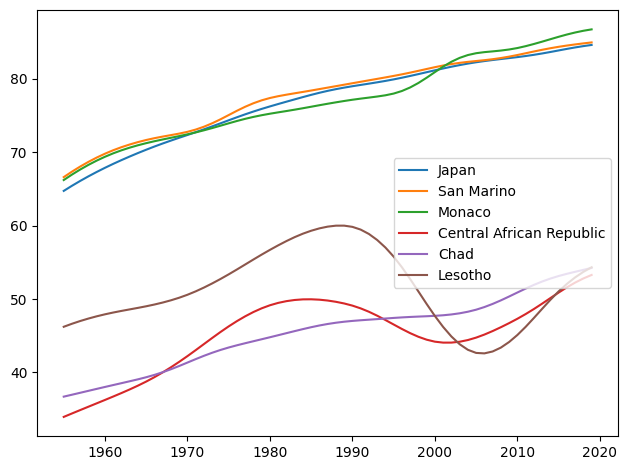

In [21]:
# ADVANCED:
# su query() ir for ciklais, .plot() komanda atavizduokite šių atrinktų valstybių
# istorinius gyvenimo trukmės duomenis

# x = year, y = life

fig, axis = plt.subplots()

for salis in ilg['Entity']:
    sel_salis = miestai.query('Entity == @salis')[['Year', 'Life expectancy']].sort_values(by='Year')
    axis.plot(sel_salis['Year'], sel_salis['Life expectancy'], label=salis)
for salis in trump['Entity']:
    sel_salis = miestai.query('Entity == @salis')[['Year', 'Life expectancy']].sort_values(by='Year')
    axis.plot(sel_salis['Year'], sel_salis['Life expectancy'], label=salis)

axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [22]:
mstgr.groups.keys()

NameError: name 'mstgr' is not defined

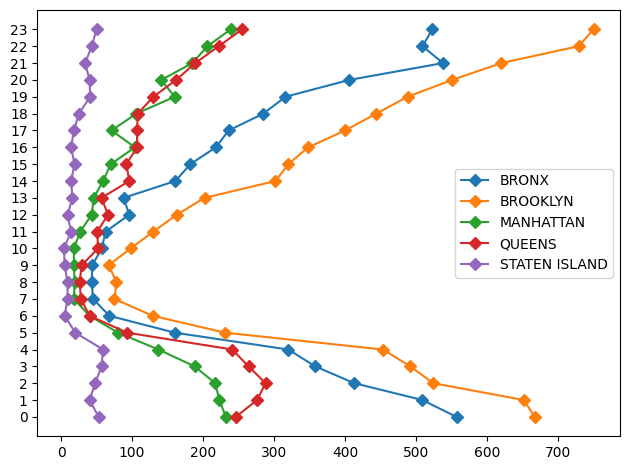

In [26]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])
nypd['H'] = nypd['OCCUR_TIME'].dt.hour
nypd = nypd[['BORO', 'PERP_RACE','VIC_RACE','H']]

nypdgr = nypd.groupby('BORO')

fig, axis = plt.subplots()
#plotting code:
for boro in nypdgr.groups.keys():
    h = nypdgr.get_group(boro)['H'].value_counts().sort_index(ascending=True)
    axis.plot(h.values, h.index, label=boro, marker='D')


axis.set_yticks(h.index)
# axis.set_xticks()

axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()
# x = year, y = life

In [27]:
# Nuskaitykite auto.csv failą.

auto = pd.read_csv('auto.csv', sep ='|')
autosmall = auto[['price', 'gamintojas', 'pagaminimo_data']]
autosmall.head()


,price,gamintojas,pagaminimo_data
0,19 500,BMW,2005-12
1,2 700,Mitsubishi,2006
2,13 490,Seat,2019-11
3,14 650,Skoda,2015-06
4,38 000,Volvo,2018-08


In [28]:
# Suraskite 5-kis automobilių gamintojus, kurių gaminamų automobilių
# vidutinė kaina yra didžiausia.autosmall['KainaS'] = autosmall['price']

kainos = []
def kainos(price):
    kainos = float(price.replace(' ', ''))
    return kainos

autosmall['KainaS'] = autosmall['price'].apply(kainos)

# gamintojai = autosmall.groupby(by='gamintojas')
# vidkaina = gamintojai.mean(numeric_only=True).sort_values(by='KainaS')
# vidkaina.tail()

vidk = autosmall[['gamintojas', 'pagaminimo_data','KainaS']].groupby('gamintojas').mean(numeric_only=True).sort_values(by='KainaS')
vidk.tail()

,KainaS
gamintojas,
Maserati,34950.000000
Land Rover,40925.000000
Tesla,45666.666667
Porsche,61999.900000
Aston Martin,125000.000000


In [29]:
autosmall.head(3)

,price,gamintojas,pagaminimo_data,KainaS
0,19 500,BMW,2005-12,19500.0
1,2 700,Mitsubishi,2006,2700.0
2,13 490,Seat,2019-11,13490.0


In [30]:
# tada suraskite 5-kis gamintojus, kurių parduodamų automobilių vidutinis
# amžius yra didžiausias.

def aut_amzius(pagaminimo_data):
    return 2024-float(pagaminimo_data[:4])

autosmall['Amzius'] = autosmall['pagaminimo_data'].apply(aut_amzius)
autosmall.head(20)

gamintojai = autosmall.groupby(by='gamintojas')
# vidamzius = gamintojai.mean(numeric_only=True).sort_values(by='Amzius')
# vidamzius.tail()
vidamz = autosmall[['gamintojas', 'pagaminimo_data','Amzius']].groupby('gamintojas').mean(numeric_only=True).sort_values(by='Amzius')
vidamz.tail()

,Amzius
gamintojas,
UAZ,35.00
Pontiac,41.50
Lada,42.50
Lincoln,55.00
GAZ,58.25


In [59]:
# nuskaitykite dus2014 ir dus2018 failus. 

du14 = pd.read_csv('DUS2014.csv')
du18 = pd.read_csv('DUS2018.csv')
d14s = du14[['lytis','amzius','issilavinimas','bdu_spalio','profesija']]
d18s = du18[['lytis','amzius','issilavinimas','bdu_spalio','profesija']]
d14s.head(30)

,lytis,amzius,issilavinimas,bdu_spalio,profesija
0,M,20-29,G4,6.00,261
1,F,20-29,G2,6.00,334
2,F,40-49,G4,6.00,221
3,F,30-39,G4,6.00,332
4,M,40-49,G2,11.33,962
5,M,30-39,G2,6.00,122
6,M,60+,G4,6.00,221
7,F,20-29,G2,13.33,531
8,M,20-29,G1,6.67,912
9,M,40-49,G2,6.00,332


In [60]:
# Suraskite vidutinius atlyginimus pagal išsilavinimo pakopą tiek 2014 tiek 2018 metams.
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), 
vid_atl14 = d14s[['issilavinimas', 'bdu_spalio']].groupby('issilavinimas').mean(numeric_only=True).sort_values(by='issilavinimas')/3.4528
vid_atl14.reset_index()

,issilavinimas,bdu_spalio
0,G1,474.744650
1,G2,543.892581
2,G3,730.410678
3,G4,1011.965397


In [61]:
vid_atl18 = d18s[['issilavinimas', 'bdu_spalio']].groupby('issilavinimas').mean(numeric_only=True).sort_values(by='issilavinimas')
vid_atl18.reset_index()

,issilavinimas,bdu_spalio
0,G1,626.391679
1,G2,732.687157
2,G3,1094.764026
3,G4,1246.451196


In [62]:
dbendr = pd.merge(left=vid_atl14, right=vid_atl18, left_on='issilavinimas', right_on='issilavinimas', how='inner')
dbendr.head()

,bdu_spalio_x,bdu_spalio_y
issilavinimas,,
G1,474.744650,626.391679
G2,543.892581,732.687157
G3,730.410678,1094.764026
G4,1011.965397,1246.451196


In [63]:
dbendr['Skirtumas'] = (dbendr['bdu_spalio_y']- dbendr['bdu_spalio_x'])/dbendr['bdu_spalio_x']*100
dbendr.head()

,bdu_spalio_x,bdu_spalio_y,Skirtumas
issilavinimas,,,
G1,474.744650,626.391679,31.942862
G2,543.892581,732.687157,34.711739
G3,730.410678,1094.764026,49.883354
G4,1011.965397,1246.451196,23.171326


In [64]:
#suraskite pokytį tarp vidutinių atlyginimų  2014 ir 2018 metams, procentais.
# pagal amžiaus grupes

def naujas_amz(amzius):
    if amzius == '14-19' or amzius == '20-29':
        return '14-29'
    else:
        return amzius

d14s['amzius'] = d14s['amzius'].apply(naujas_amz)
vid_atl14_amz = d14s[['issilavinimas', 'bdu_spalio', 'amzius']].groupby('amzius',).mean(numeric_only=True).sort_values(by='amzius')/3.4528
vid_atl14_amz.reset_index()



,amzius,bdu_spalio
0,14-29,599.366241
1,30-39,795.907989
2,40-49,700.619410
3,50-59,666.763134
4,60+,626.854754


In [65]:
vid_atl18_amz = d18s[['issilavinimas', 'bdu_spalio', 'amzius']].groupby('amzius',).mean(numeric_only=True).sort_values(by='amzius')
vid_atl18_amz.reset_index()

,amzius,bdu_spalio
0,14-29,865.563301
1,30-39,1088.955721
2,40-49,980.855429
3,50-59,856.067124
4,60+,784.542386


In [66]:
dbendr_naujas = pd.merge(left=vid_atl14_amz, right=vid_atl18_amz, left_on='amzius', right_on='amzius', how='inner')
dbendr_naujas.head()

,bdu_spalio_x,bdu_spalio_y
amzius,,
14-29,599.366241,865.563301
30-39,795.907989,1088.955721
40-49,700.619410,980.855429
50-59,666.763134,856.067124
60+,626.854754,784.542386


In [67]:
dbendr_naujas['Skirtumas_pagalamziu'] = (dbendr_naujas['bdu_spalio_y']- dbendr_naujas['bdu_spalio_x'])/dbendr_naujas['bdu_spalio_x']*100
dbendr_naujas.head()

,bdu_spalio_x,bdu_spalio_y,Skirtumas_pagalamziu
amzius,,,
14-29,599.366241,865.563301,44.413089
30-39,795.907989,1088.955721,36.819298
40-49,700.619410,980.855429,39.998324
50-59,666.763134,856.067124,28.391490
60+,626.854754,784.542386,25.155370


In [70]:
du14 = pd.read_csv('DUS2014.csv')
du18 = pd.read_csv('DUS2018.csv')
d14s = du14[['lytis','amzius','issilavinimas','bdu_spalio','profesija']]
d18s = du18[['lytis','amzius','issilavinimas','bdu_spalio','profesija']]
# aojungiu dvi pirmas  2014m grupes i viena: 
def apjungimas(amzius):
    if amzius == '14-19' or amzius == '20-29':
        return '14-29'
    else:
        return amzius
d14s['amzius'] = d14s['amzius'].apply(apjungimas)
d14s # kai ir pakeitimo puseje paminim ta pati stulpelio pavadinima, tai nauji duomenys uzsiraso ant virsaus ir nebereikia naujo stulpelio su naujais duomenim
# atlyginimu vidurkis
vidAtl2014_2= d14s.groupby(by='amzius')['bdu_spalio'].mean(numeric_only=True).sort_index().reset_index()
vidAtl2014_2.head(10)

,amzius,bdu_spalio
0,14-29,2069.491756
1,30-39,2748.111104
2,40-49,2419.098697
3,50-59,2302.199750
4,60+,2164.404096


In [71]:
def pavConverter(amzius):
    if amzius == '14-19' or amzius == '20-29':
        return '14-29'
    else:
        return amzius
    
d14s['amzius'] = d14s['amzius'].apply(pavConverter)
d14s_amzius = d14s[['bdu_spalio','amzius']].groupby(by='amzius').mean(numeric_only=True).sort_values(by='bdu_spalio').sort_values(by='amzius') / 3.45
d14s_amzius.head(6).reset_index()
d18s_amzius = d18s[['bdu_spalio','amzius']].groupby(by='amzius').mean(numeric_only=True).sort_values(by='bdu_spalio').sort_values(by='amzius')
d18s_amzius.head(6).reset_index()
d18s_amzius_sujung=  pd.merge(left= d14s_amzius, right= d18s_amzius,
                                 left_on='amzius', right_on='amzius', how='inner')
d18s_amzius_sujung.head().reset_index()
d18s_amzius_sujung['bdu_spalio_proc'] = (d18s_amzius_sujung['bdu_spalio_y'] - d18s_amzius_sujung['bdu_spalio_x']) / d18s_amzius_sujung['bdu_spalio_x'] *100
d18s_amzius_sujung.head().reset_index()

,amzius,bdu_spalio_x,bdu_spalio_y,bdu_spalio_proc
0,14-29,599.852683,865.563301,44.295979
1,30-39,796.553943,1088.955721,36.708346
2,40-49,701.188028,980.855429,39.884794
3,50-59,667.304275,856.067124,28.287373
4,60+,627.363506,784.542386,25.053877
